In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [41]:
import descartes

In [42]:
%matplotlib inline

In [43]:
melb_map=gpd.read_file(r'C:\Users\Charith Rasara\Documents\MelbourneTest\Postcodes\geo_export_3bcea22f-2dda-45f9-91ea-ab46bf874a6a.shp')

Read melbourne shape file

<AxesSubplot:>

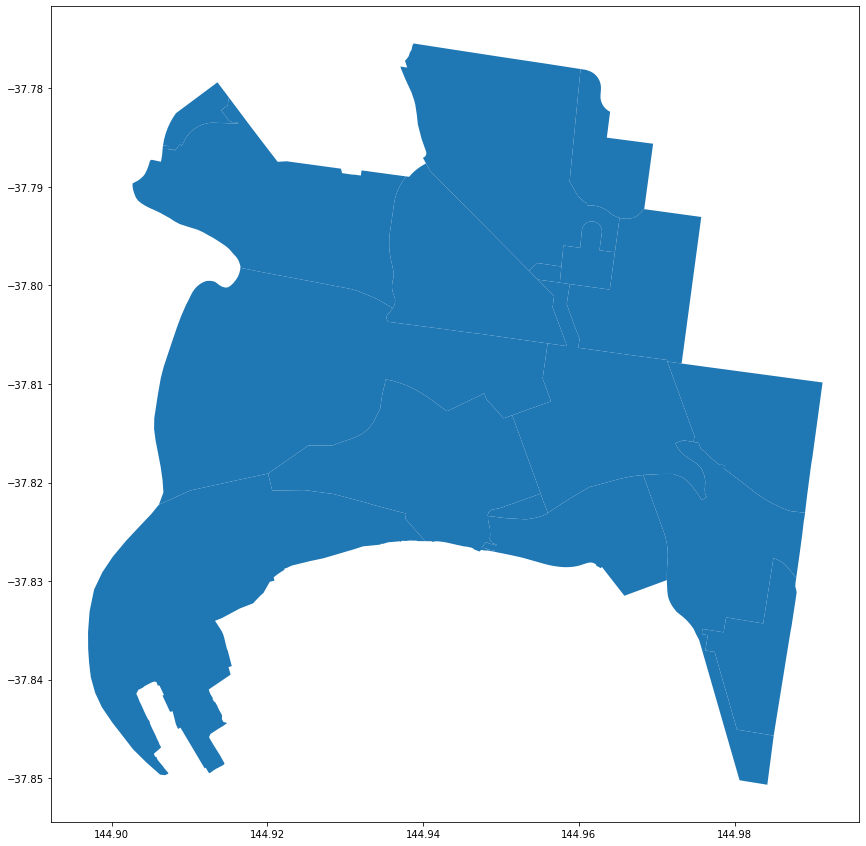

In [44]:
fig, ax=plt.subplots(figsize=(15,15))
melb_map.plot(ax=ax)

plot the map

In [68]:
df=pd.read_csv(r'C:\Users\Charith Rasara\Documents\MelbourneTest\Pedestrian_Counting_System_-_Sensor_Locations_Dropped_Removed_devices.csv')
crs={'init':'epsg:4326'}
df.head()

,Unnamed: 0,sensor_id,sensor_description,sensor_name,installation_date,status,note,direction_1,direction_2,latitude,longitude,location
0,0,57,Bourke St Bridge,BouBri_T,2018/08/13,A,NaN,East,West,-37.817660,144.950262,"(-37.81766034, 144.95026189)"
1,1,32,City Square,CSq_T,2013/12/20,R,Device has been removed (24/01/2017),NaN,NaN,-37.815724,144.966863,"(-37.81572426, 144.96686315)"
2,2,68,Flinders Ln -Degraves St (North),FLDegN_T,2020/06/03,A,NaN,East,West,-37.816835,144.965604,"(-37.81683473, 144.96560387)"
3,3,40,Lonsdale St-Spring St (West),Spr201_T,2015/01/19,A,NaN,South,North,-37.809980,144.972282,"(-37.80998025, 144.97228184)"
4,4,1,Bourke Street Mall (North),Bou292_T,2009/03/24,A,NaN,East,West,-37.813481,144.965159,"(-37.81348124, 144.96515921)"


read csv containing lat, lon of sensor locations

In [69]:
geometry=[Point(xy) for xy in zip( df["longitude"], df["latitude"])]

create geometry variable by taking long,lat. Mandatory to have longtitude first

In [70]:
geometry[:3]

In [71]:
geo_df=gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

C:\Users\Charith Rasara\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


create geo_df

In [72]:
geo_df.head()

,Unnamed: 0,sensor_id,sensor_description,sensor_name,installation_date,status,note,direction_1,direction_2,latitude,longitude,location,geometry
0,0,57,Bourke St Bridge,BouBri_T,2018/08/13,A,NaN,East,West,-37.817660,144.950262,"(-37.81766034, 144.95026189)",POINT (144.95026 -37.81766)
1,1,32,City Square,CSq_T,2013/12/20,R,Device has been removed (24/01/2017),NaN,NaN,-37.815724,144.966863,"(-37.81572426, 144.96686315)",POINT (144.96686 -37.81572)
2,2,68,Flinders Ln -Degraves St (North),FLDegN_T,2020/06/03,A,NaN,East,West,-37.816835,144.965604,"(-37.81683473, 144.96560387)",POINT (144.96560 -37.81683)
3,3,40,Lonsdale St-Spring St (West),Spr201_T,2015/01/19,A,NaN,South,North,-37.809980,144.972282,"(-37.80998025, 144.97228184)",POINT (144.97228 -37.80998)
4,4,1,Bourke Street Mall (North),Bou292_T,2009/03/24,A,NaN,East,West,-37.813481,144.965159,"(-37.81348124, 144.96515921)",POINT (144.96516 -37.81348)


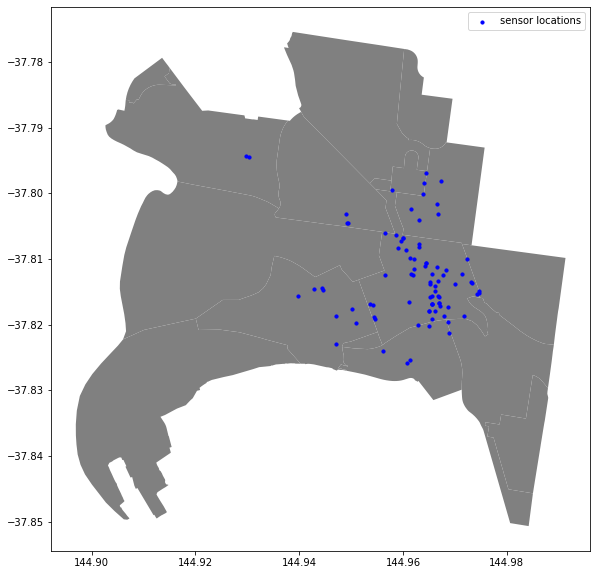

In [73]:
fig, ax =plt.subplots(figsize=(10,10))
melb_map.plot(ax=ax,color="grey")
geo_df.plot(ax=ax, markersize=10, color="blue",marker="o", label="sensor locations")
plt.legend(prop={'size':10})


plot the city map and then plot points on it.